# Neural Networks

Neural networks are advanced computational models inspired by the human brain. They can be thought of as sophisticated forms of logistic regression that automatically learn hierarchical features from data—eliminating the need for manual feature engineering. Instead of pre-selecting features, the network learns the best representations during training.

**Key Advantages:**
- **Automatic Feature Learning:**  
  Neural networks discover and extract useful features directly from raw data.  
  *Analogy:* Rather than a chef pre-selecting ingredients, the network experiments with combinations until it finds the best recipe for prediction.
- **Flexible Architecture:**  
  Design choices include the number of hidden layers and neurons per layer, which can be adapted to the problem at hand.

---

## Network Architecture

A typical neural network consists of several layers:

- **Input Layer:**  Receives the raw data as a feature vector.
- **Hidden Layers:** Intermediate layers where the network extracts increasingly complex features.
- **Output Layer:** Produces the final prediction (e.g., a probability or classification label).

**Fully Connected Layers:**  
    In these layers, each neuron receives input from every neuron in the previous layer, allowing the network to learn which features are most important.
    
**Activation Functions:**  
    Each neuron applies an activation function (such as the sigmoid function) to a linear combination of its inputs. The sigmoid function is defined as:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

where $z$ is the weighted sum of inputs plus a bias term.

**Illustration of a Neuron:**
- **Linear Combination:**  
  For an input vector $\mathbf{x}$, weights $\mathbf{w}$, and bias $b$, the neuron computes:

$$z = \mathbf{w} \cdot \mathbf{x} + b$$

- **Activation:**  
  The output (or activation) is:

$$a = \sigma(z) = \frac{1}{1 + e^{-z}}$$

---

## Examples

### T-Shirt Demand Prediction (Single Feature)

Suppose we want to predict whether a T-shirt is a top seller based solely on its price.

- **Input Feature:** Price, denoted by $x$.
- **Neuron Computation:**  
  The neuron calculates a weighted sum plus a bias and passes it through the sigmoid activation:

$$
a = \sigma(wx + b) = \frac{1}{1 + e^{-(wx + b)}}
$$

  Here, $w$ is the weight, $b$ is the bias, and $a$ represents the probability that the T-shirt is a top seller.

### Expanded Case (Multiple Features)
Now, consider a model that uses several features:
- **Input Features:** Price, Shipping Cost, Marketing Spend, Material Quality.
- **Key Factors:**
  1. **Affordability:** A function of price and shipping cost.
  2. **Awareness:** Driven by marketing spend.
  3. **Perceived Quality:** Influenced by material quality and price.

**Network Structure:**
- **Input Layer:**  
  The feature vector is:

$$
\mathbf{x} = [\text{Price}, \text{Shipping Cost}, \text{Marketing Spend}, \text{Material Quality}]
$$

- **Hidden Layer:**  
  Contains 3 neurons, each learning one of the key factors (Affordability, Awareness, Perceived Quality).
- **Output Layer:**  
  A single neuron that combines the hidden layer activations to compute the final probability that the T-shirt is a top seller.

**Diagram:**

| **Layer**       | **Number of Neurons** | **Role**                                                       |
|-----------------|-----------------------|----------------------------------------------------------------|
| **Input Layer** | 4                     | Receives raw features.                                         |
| **Hidden Layer**| 3                     | Learns intermediate features (Affordability, Awareness, Quality). |
| **Output Layer**| 1                     | Outputs the final probability prediction.                      |

---

### Neural Networks in Computer Vision – Face Recognition

Consider training a neural network to recognize a face in an image.

- **Image Details:**  
  A grayscale image of size $1000 \times 1000$ pixels. Each pixel has an intensity value from 0 to 255.
- **Data Representation:**  
  The image is represented as a $1000 \times 1000$ matrix, which is flattened into a vector:

$$
\mathbf{x} \in \mathbb{R}^{1\,000\,000}
$$

**Network Architecture for Face Recognition:**
- **Input Layer:**  
  Receives the flattened pixel intensity vector.
- **Hidden Layers:**  
  - **First Hidden Layer:** Detects low-level features such as edges (using small image regions).
  - **Second Hidden Layer:** Combines edges to form facial parts (like eyes and nose) using larger regions.
  - **Third Hidden Layer (optional):** Aggregates parts to recognize complete face shapes.
- **Output Layer:**  
  Outputs a probability distribution over possible identities (often using a softmax function).

| **Layer**         | **Role**                                       | **Learned Features**                                  |
|-------------------|------------------------------------------------|-------------------------------------------------------|
| **Input Layer**   | Raw pixel intensities                          | N/A                                                   |
| **1st Hidden Layer** | Extracts basic features                      | Edges and simple lines                                |
| **2nd Hidden Layer** | Combines features into facial parts          | Eyes, nose, and other facial features                |
| **3rd Hidden Layer** | Aggregates parts into full face shapes       | Complete facial structure (if used)                   |
| **Output Layer**  | Classifies the image into a person’s identity  | Identity probabilities (via softmax)                  |

*Tip:* The network learns these features automatically from the training data.

---

### Handwritten Digit Recognition

- **Task:** Classify an $8 \times 8$ grayscale image as either the digit 0 or 1.
- **Input:**  
  The image is flattened into a 64-dimensional vector:

$$
\mathbf{x} \in \mathbb{R}^{64}
$$

- **Neural Network Architecture:**
  - **Input Layer (Layer 0):** 64 features.
  - **Hidden Layer 1 (Layer 1):** 25 neurons.
  - **Hidden Layer 2 (Layer 2):** 15 neurons.
  - **Output Layer (Layer 3):** 1 neuron that outputs a probability for the digit 1.

## Forward Propagation Process

Forward propagation computes the network output by passing the input through each layer:

1. **From Input to First Hidden Layer:**

$$
\mathbf{a}^{[1]} = \sigma\left(W^{[1]} \mathbf{x} + b^{[1]}\right)
$$

   - $W^{[1]}$ is the weight matrix and $b^{[1]}$ is the bias vector for Layer 1.

2. **From First to Second Hidden Layer:**

$$
\mathbf{a}^{[2]} = \sigma\left(W^{[2]} \mathbf{a}^{[1]} + b^{[2]}\right)
$$

3. **From Second Hidden Layer to Output Layer:**

$$
a^{[3]} = \sigma\left(W^{[3]} \mathbf{a}^{[2]} + b^{[3]}\right)
$$

   - Here, $a^{[3]}$ is a scalar representing the probability that the image is the digit 1.

4. **Prediction:**  
   A threshold is applied (commonly 0.5) to convert the probability into a binary label:
   - If $a^{[3]} \ge 0.5$, predict **1**.
   - Otherwise, predict **0**.

**Summary of Forward Propagation:**
- **Step 1:** Process input features through the network layer by layer.
- **Step 2:** Compute activations using:

$$a_j^{[l]} = \sigma\left(w_j^{[l]} \cdot \mathbf{a}^{[l-1]} + b_j^{[l]}\right)$$

- Where $l$ is the layer number and $j$ is the $j^{th}$ neuron in that layer.
    
- **Step 3:** Use the final activation to make a prediction.

---

## Mathematical Computation and Notation

Understanding the computation within each layer is crucial. The following sections summarize the mathematical foundations and notation conventions used in neural networks.

### Neuron Computation

Each neuron performs two key operations:
1. **Linear Combination:**

$$
z = \mathbf{w} \cdot \mathbf{x} + b
$$

   where:
   - $\mathbf{x}$ is the input vector.
   - $\mathbf{w}$ is the weight vector.
   - $b$ is the bias term.
2. **Activation:**

$$
a = \sigma(z) = \frac{1}{1 + e^{-z}}
$$

   The activation function $\sigma(\cdot)$ (here, the sigmoid) determines the neuron's output.

### Notation Conventions

- **Layer Indexing:**  
  The input layer is denoted as $\mathbf{a}^{[0]}$, while subsequent layers are labeled with superscripts in square brackets. For example:
  - $\mathbf{a}^{[1]}$ is the activation vector of the first hidden layer.
  - $W^{[l]}$ and $b^{[l]}$ denote the weights and biases for Layer $l$.
- **Neuron-Specific Parameters:**  
  For the $j^\text{th}$ neuron in layer $l$, the activation is:

$$
a_j^{[l]} = \sigma\left(w_j^{[l]} \cdot \mathbf{a}^{[l-1]} + b_j^{[l]}\right)
$$

  where $w_j^{[l]}$ is the weight vector and $b_j^{[l]}$ is the bias for that neuron.

### Example Computation in a Hidden Layer

Suppose a hidden layer has three neurons. For each neuron $i$:

1. **Compute the Linear Combination:**

$$
z_i^{[1]} = w_i^{[1]} \cdot \mathbf{x} + b_i^{[1]}
$$

2. **Apply the Activation Function:**

$$
a_i^{[1]} = \sigma(z_i^{[1]})
$$
   
If the computed activations are:

$$
a_1^{[1]} \approx 0.3,\quad a_2^{[1]} \approx 0.7,\quad a_3^{[1]} \approx 0.2,
$$

the activation vector for this layer is:

$$
\mathbf{a}^{[1]} = \begin{bmatrix} 0.3 \\ 0.7 \\ 0.2 \end{bmatrix}.
$$

This vector is then used as the input to the next layer.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid

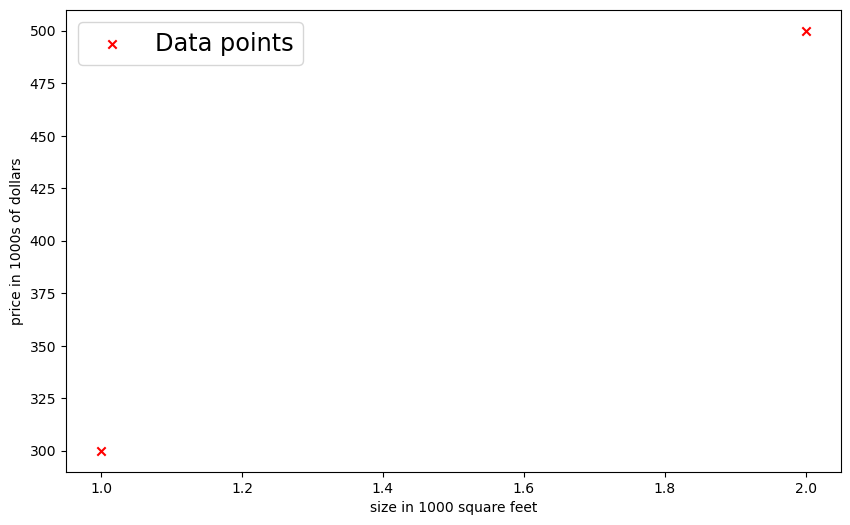

In [53]:
X_train = np.array([[1.0], [2.0]], dtype=np.float32)           #(size in 1000 square feet)
y_train = np.array([[300.0], [500.0]], dtype=np.float32)       #(price in 1000s of dollars)


fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(X_train, y_train, marker="x", color="red", label="Data points")
ax.set(
    ylabel="price in 1000s of dollars",
    xlabel="size in 1000 square feet"
)
ax.legend(fontsize='xx-large')

In [54]:
# We can define a layer with one neuron or unit and compare it to the familiar linear regression function.
# s a fully-connected (or "dense") neural network layer provided by TensorFlow’s Keras API. 
# In a dense layer, every input unit (or neuron) is connected to every output unit. 
# This layer is one of the most common building blocks in neural network architectures.
linear_layer = Dense(units=1, activation='linear')

# Let's examine the weights, currently empty because it is not yet initialized.
linear_layer.get_weights() 

[]

In [55]:
# Let's try the model on one example in `X_train`. This will trigger the instantiation of the weights. 
# Note, the input to the layer must be 2-D, so we'll reshape it.
a1 = linear_layer(X_train[0].reshape(1,1))

# The result is a tensor (another name for an array) with a shape of (1,1) or one entry.   
print(a1)

tf.Tensor([[-1.2864261]], shape=(1, 1), dtype=float32)


In [56]:
# Now let's look at the weights and bias.
# These weights are randomly initialized to small numbers and the bias defaults to being initialized to zero.
w, b= linear_layer.get_weights()
print(f"w = {w}, b={b}")

w = [[-1.2864261]], b=[0.]


In [57]:
# The weights are initialized to random values so let's set them to some known values.
set_w = np.array([[200]])
set_b = np.array([100])

# set_weights takes a list of numpy arrays
linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [61]:
# Now let's use the model to make predictions
prediction = linear_layer(X_train)
print(prediction)

tf.Tensor(
[[300.]
 [500.]], shape=(2, 1), dtype=float32)


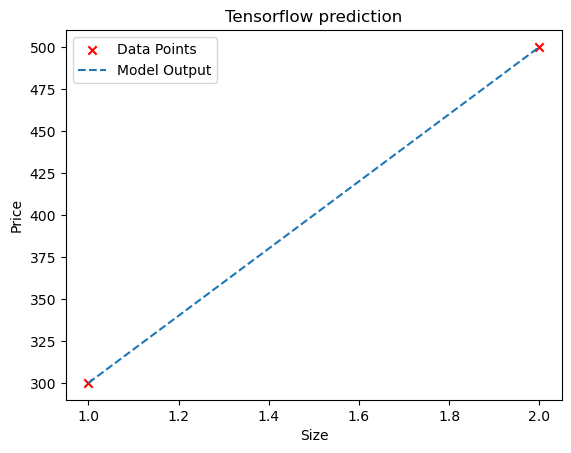

In [67]:
# Let's plot the linear prediction

plt.scatter(X_train, y_train, c="r", marker="x", label="Data Points")
plt.plot(X_train, prediction, label="Model Output", linestyle="--")
plt.title("Tensorflow prediction")
plt.xlabel("Size")
plt.ylabel("Price")
plt.legend()


In [68]:
# Now let's try with a logistic model:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix

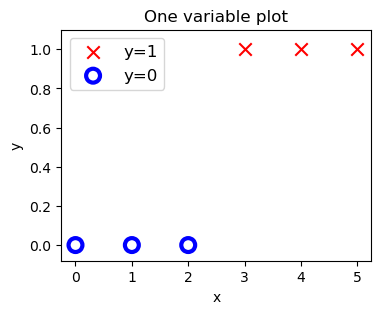

In [77]:
pos = y_train == 1
neg = y_train == 0

fig,ax = plt.subplots(1,1,figsize=(4,3))
ax.scatter(X_train[pos], y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(X_train[neg], y_train[neg], marker='o', s=100, label="y=0", facecolors='none', edgecolors="blue", lw=3)
ax.set(ylim=(-0.08,1.1), xlabel="x", ylabel="y", title="One variable plot")
ax.legend(fontsize=12)
plt.show()

In [81]:
# We can implement a 'logistic neuron' by adding a sigmoid activation.
# Tensorflow is most often used to create multi-layer models. The Sequential model is a convenient means of constructing these models.

model = Sequential(
    [
        Input(shape=(1,)),  # Define the input shape explicitly or pass input_shape to the First Layer
        Dense(1, "sigmoid", name="L1")
    ]
)
              

In [83]:
# `model.summary()` shows the layers and number of parameters in the model. 
# There is only one layer in this model and that layer has only one unit. The unit has two parameters, $w$ and $b$.
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [84]:
# Let's get the first layer (that we named L1) and examine the weights
logistic_layer = model.get_layer('L1')
w,b = logistic_layer.get_weights()
print(w,b)
print(w.shape,b.shape)

[[-1.5984031]] [0.]
(1, 1) (1,)


In [85]:
# Let's update the weights for our layer
set_w = np.array([[2]])
set_b = np.array([-4.5])
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [89]:
# Now let's use our model to make a prediction
predictions = model.predict(X_train) # Eq to model(X_train)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([[0.01098694],
       [0.07585817],
       [0.37754068],
       [0.81757444],
       [0.97068775],
       [0.99592984]], dtype=float32)